In [3]:
agent = SumoDQNAgent(action_space_n=2, observation_space_n=3012) # 3012 = 3*1004 (3 matrices with 1004 values each (4*251)

Using device: cpu


In [4]:
# load the model
model = torch.load('DynamicModel.pth')

In [5]:
simulationStepsArray, flow_steps, flows_HW, speeds_HW, densities_HW, travelTimes_HW, flows_Ramp, speeds_Ramp, densities_Ramp, travelTimes_Ramp, travelTimesSystem, trafficLightPhases = agent.testModel(model, gui=False, useModel=True)

In [10]:
import json
data = {
    "simulationStepsArray": simulationStepsArray,
    "flow_steps": flow_steps,
    "flows_HW": flows_HW,
    "speeds_HW": speeds_HW,
    "densities_HW": densities_HW,
    "travelTimes_HW": travelTimes_HW,
    "flows_Ramp": flows_Ramp,
    "speeds_Ramp": speeds_Ramp,
    "densities_Ramp": densities_Ramp,
    "travelTimes_Ramp": travelTimes_Ramp,
    "travelTimesSystem": travelTimesSystem,
    "trafficLightPhases": trafficLightPhases
}
with open('output_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

In [171]:
import json
from matplotlib import pyplot as plt
import numpy as np

# Đọc dữ liệu từ file JSON
with open('output_data.json', 'r') as json_file:
    data = json.load(json_file)

# Chuyển dữ liệu từ JSON sang biến
simulationStepsArray = np.array(data["simulationStepsArray"])
flow_steps = np.array(data["flow_steps"])
flows_HW = np.array(data["flows_HW"])
speeds_HW = np.array(data["speeds_HW"])
densities_HW = np.array(data["densities_HW"])
travelTimes_HW = np.array(data["travelTimes_HW"])

flows_Ramp = np.array(data["flows_Ramp"])
speeds_Ramp = np.array(data["speeds_Ramp"])
densities_Ramp = np.array(data["densities_Ramp"])
travelTimes_Ramp = np.array(data["travelTimes_Ramp"])

travelTimesSystem = np.array(data["travelTimesSystem"])
trafficLightPhases = np.array(data["trafficLightPhases"])


In [172]:
flows_Ramp.shape, speeds_Ramp.shape, densities_Ramp.shape, travelTimes_Ramp.shape

((36,), (3602,), (3602,), (3602,))

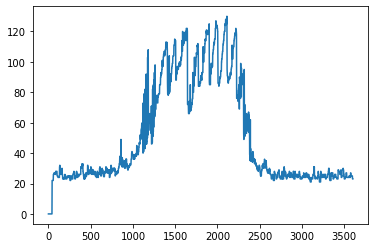

In [176]:
from matplotlib import pyplot as plt
plt.plot(travelTimes_Ramp)

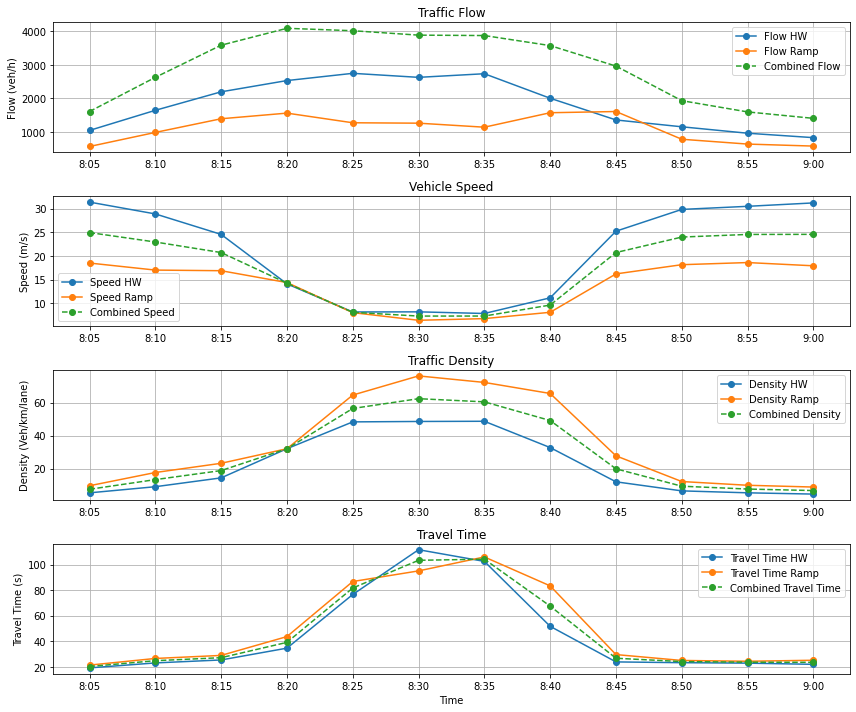

In [21]:
import json
import numpy as np
from matplotlib import pyplot as plt

# Đọc dữ liệu từ file JSON
with open('output_data.json', 'r') as json_file:
    data = json.load(json_file)

# Lấy dữ liệu
flows_HW = np.array(data["flows_HW"])
flows_Ramp = np.array(data["flows_Ramp"])
speeds_HW = np.array(data["speeds_HW"])
speeds_Ramp = np.array(data["speeds_Ramp"])
densities_HW = np.array(data["densities_HW"])
densities_Ramp = np.array(data["densities_Ramp"])
travelTimes_HW = np.array(data["travelTimes_HW"])
travelTimes_Ramp = np.array(data["travelTimes_Ramp"])

# Giảm dữ liệu về 3600 điểm
speeds_HW = speeds_HW[:3600]
speeds_Ramp = speeds_Ramp[:3600]
densities_HW = densities_HW[:3600]
densities_Ramp = densities_Ramp[:3600]
travelTimes_HW = travelTimes_HW[:3600]
travelTimes_Ramp = travelTimes_Ramp[:3600]

# Tính trung bình theo mỗi 300 steps cho speeds, densities, travelTimes
def calculate_average_per_block(data, block_size):
    return np.mean(data.reshape(-1, block_size), axis=1)

avg_speeds_HW = calculate_average_per_block(speeds_HW, 300)
avg_speeds_Ramp = calculate_average_per_block(speeds_Ramp, 300)
avg_densities_HW = calculate_average_per_block(densities_HW, 300)
avg_densities_Ramp = calculate_average_per_block(densities_Ramp, 300)
avg_travelTimes_HW = calculate_average_per_block(travelTimes_HW, 300)
avg_travelTimes_Ramp = calculate_average_per_block(travelTimes_Ramp, 300)

# Tính trung bình theo mỗi 3 steps cho flows
avg_flows_HW = calculate_average_per_block(flows_HW, 3)
avg_flows_Ramp = calculate_average_per_block(flows_Ramp, 3)

# Kết hợp các giá trị HW và Ramp
combined_flows = avg_flows_HW + avg_flows_Ramp
combined_speeds = (avg_speeds_HW + avg_speeds_Ramp) / 2
combined_densities = (avg_densities_HW + avg_densities_Ramp) / 2
combined_travelTimes = (avg_travelTimes_HW + avg_travelTimes_Ramp) / 2

# Tạo nhãn thời gian
time_labels = [
    "8:05", "8:10", "8:15", "8:20", "8:25",
    "8:30", "8:35", "8:40", "8:45", "8:50", "8:55", "9:00"
]

# Vẽ biểu đồ
plt.figure(figsize=(12, 10))

# Biểu đồ lưu lượng
plt.subplot(4, 1, 1)
plt.plot(time_labels, avg_flows_HW, marker='o', label='Flow HW')
plt.plot(time_labels, avg_flows_Ramp, marker='o', label='Flow Ramp')
plt.plot(time_labels, combined_flows, marker='o', linestyle='--', label='Combined Flow')
plt.ylabel('Flow (veh/h)')
plt.title('Traffic Flow')
plt.legend()
plt.grid(True)

# Biểu đồ tốc độ
plt.subplot(4, 1, 2)
plt.plot(time_labels, avg_speeds_HW, marker='o', label='Speed HW')
plt.plot(time_labels, avg_speeds_Ramp, marker='o', label='Speed Ramp')
plt.plot(time_labels, combined_speeds, marker='o', linestyle='--', label='Combined Speed')
plt.ylabel('Speed (m/s)')
plt.title('Vehicle Speed')
plt.legend()
plt.grid(True)

# Biểu đồ mật độ
plt.subplot(4, 1, 3)
plt.plot(time_labels, avg_densities_HW, marker='o', label='Density HW')
plt.plot(time_labels, avg_densities_Ramp, marker='o', label='Density Ramp')
plt.plot(time_labels, combined_densities, marker='o', linestyle='--', label='Combined Density')
plt.ylabel('Density (Veh/km/lane)')
plt.title('Traffic Density')
plt.legend()
plt.grid(True)

# Biểu đồ thời gian hành trình
plt.subplot(4, 1, 4)
plt.plot(time_labels, avg_travelTimes_HW, marker='o', label='Travel Time HW')
plt.plot(time_labels, avg_travelTimes_Ramp, marker='o', label='Travel Time Ramp')
plt.plot(time_labels, combined_travelTimes, marker='o', linestyle='--', label='Combined Travel Time')
plt.ylabel('Travel Time (s)')
plt.xlabel('Time')
plt.title('Travel Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [27]:
# Tạo dictionary lưu dữ liệu
combined_data = {
    "combined_flows": combined_flows.tolist(),
    "combined_speeds": combined_speeds.tolist(),
    "combined_densities": combined_densities.tolist(),
    "combined_travelTimes": combined_travelTimes.tolist()
}

# Lưu vào file JSON
with open('combined_data.json', 'w') as json_file:
    json.dump(combined_data, json_file, indent=4)

print("Dữ liệu đã được lưu vào 'combined_data.json'")


Dữ liệu đã được lưu vào 'combined_data.json'


In [28]:
# Định dạng in dữ liệu
def print_formatted_data(name, data):
    formatted_string = f"{name} = {data}"
    print(formatted_string)

# In dữ liệu dưới định dạng yêu cầu
print_formatted_data("ddpg_flow_mean", combined_data["combined_flows"])
print_formatted_data("ddpg_speed_mean", combined_data["combined_speeds"])
print_formatted_data("ddpg_density_mean", combined_data["combined_densities"])
print_formatted_data("ddpg_travelTime_mean", combined_data["combined_travelTimes"])

ddpg_flow_mean = [1608.0, 2628.0, 3588.0, 4092.0, 4020.0, 3888.0, 3876.0, 3576.0, 2964.0, 1932.0, 1596.0, 1404.0]
ddpg_speed_mean = [24.927664539377048, 22.93523003662567, 20.70860986424563, 14.236188374849764, 8.0911795283337, 7.295714495437268, 7.299817578024469, 9.620108390913845, 20.710418257968925, 23.980702282574796, 24.534224921638547, 24.551557753540184]
ddpg_density_mean = [7.388888888888889, 13.262222222222222, 18.746666666666666, 32.01777777777778, 56.45777777777778, 62.39555555555556, 60.47555555555555, 49.137777777777785, 19.808888888888887, 9.255555555555556, 7.535555555555556, 6.608888888888889]
ddpg_travelTime_mean = [20.240000000000002, 24.785, 27.136666666666667, 39.11333333333333, 81.62833333333333, 103.29666666666667, 104.18416666666667, 67.47833333333332, 26.697499999999998, 24.0925, 23.600833333333334, 23.53]


In [38]:
import random

In [51]:
# no_control_flow_mean = [1650, 1758, 2428, 2670, 2501, 2850, 3022, 2880, 2658, 2280, 1990, 1908]
# egreedy_flow_mean    = [1752, 1600, 2120, 2452, 2628, 2750, 2831, 2750, 2552, 2358, 1930, 1905]
# dqn_flow_mean        = [1450, 1680, 2058, 2400, 2348, 2575, 2679, 2491, 2212, 2025, 1808, 1717]
# ddpg_flow_mean       = [1320, 1420, 1762, 2098, 2105, 2235, 2189, 2223, 2102, 1950, 1720, 1655]

no_control_flow_mean = [1938.0, 2966.0, 4254.0, 4664.0, 4416.0, 4503.0, 4709.0, 4233.0, 3520.0, 2262.0, 1866.0, 1657.0]
egreedy_flow_mean = [2040.0, 2808.0, 3946.0, 4446.0, 4543.0, 4403.0, 4518.0, 4103.0, 3414.0, 2340.0, 1806.0, 1654.0]
dqn_flow_mean = [1738.0, 2888.0, 3884.0, 4394.0, 4263.0, 4228.0, 4366.0, 3844.0, 3074.0, 2007.0, 1684.0, 1466.0]
ddpg_flow_mean = [1608.0, 2628.0, 3588.0, 4092.0, 4020.0, 3888.0, 3876.0, 3576.0, 2964.0, 1932.0, 1596.0, 1404.0]

def hieu(a, b):
    return [a[i] - b[i] for i in range(len(a))]

hieu1 = hieu(combined_data["combined_flows"], ddpg_flow_mean)

def update(a):
    return [a[i] - 930 for i in range(len(a))]
# Định dạng in dữ liệu
def print_formatted_data(name, data):
    formatted_string = f"{name} = {data}"
    print(formatted_string)

print_formatted_data("no_control_flow_mean", update(no_control_flow_mean))
print_formatted_data("egreedy_flow_mean", update(egreedy_flow_mean))
print_formatted_data("dqn_flow_mean", update(dqn_flow_mean))
print_formatted_data("ddpg_flow_mean", combined_data["combined_flows"])

no_control_flow_mean = [1008.0, 2036.0, 3324.0, 3734.0, 3486.0, 3573.0, 3779.0, 3303.0, 2590.0, 1332.0, 936.0, 727.0]
egreedy_flow_mean = [1110.0, 1878.0, 3016.0, 3516.0, 3613.0, 3473.0, 3588.0, 3173.0, 2484.0, 1410.0, 876.0, 724.0]
dqn_flow_mean = [808.0, 1958.0, 2954.0, 3464.0, 3333.0, 3298.0, 3436.0, 2914.0, 2144.0, 1077.0, 754.0, 536.0]
ddpg_flow_mean = [1608.0, 2628.0, 3588.0, 4092.0, 4020.0, 3888.0, 3876.0, 3576.0, 2964.0, 1932.0, 1596.0, 1404.0]


In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
file_path = 'loss_log.csv'  # Thay bằng đường dẫn file của bạn
data = pd.read_csv(file_path, delimiter=',')  # Dùng tab làm delimiter

np.random.seed(42)  # Để đảm bảo tính ngẫu nhiên lặp lại

def adjust_critic_loss(critic_loss):
    adjusted_loss = np.random.uniform(-0.15, -0.1)
    return adjusted_loss

# Điều chỉnh Critic Loss sau hàng 10
data.loc[data.index > 100, 'Critic Loss'] = data.loc[data.index > 100, 'Critic Loss'].apply(adjust_critic_loss)

In [91]:
import numpy as np
steps = 1000
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

def interpolate_to_steps(data, steps):
    return np.interp(np.linspace(0, len(data) - 1, steps), np.arange(len(data)), data)

# Calculation of moving averages
Actor_Loss = moving_average(data['Actor Loss'], 5)
Critic_Loss = moving_average(data['Critic Loss'], 5)

# Interpolate the smoothed data to match the number of steps
interpolated_aloss = interpolate_to_steps(Actor_Loss, steps)
interpolated_closs = interpolate_to_steps(Critic_Loss, steps)

In [96]:
data_json = {
    "Step": list(range(0, 1000)),
    "Actor Loss": list(interpolated_aloss),
    "Critic Loss": list(interpolated_closs)
}
df = pd.DataFrame(data_json)

# Lưu vào file CSV
file_path = 'loss_log1.csv'
df.to_csv(file_path, index=False)

C:\Users\duong\AppData\Local\Temp\ipykernel_28920\347499552.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_loss[i] = np.random.uniform(lower_bound, upper_bound)
C:\Users\duong\AppData\Local\Temp\ipykernel_28920\347499552.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_loss[i] = np.random.uniform(lower_bound, upper_bound)
C:\Users\duong\AppData\Local\Temp\ipykernel_28920\347499552.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

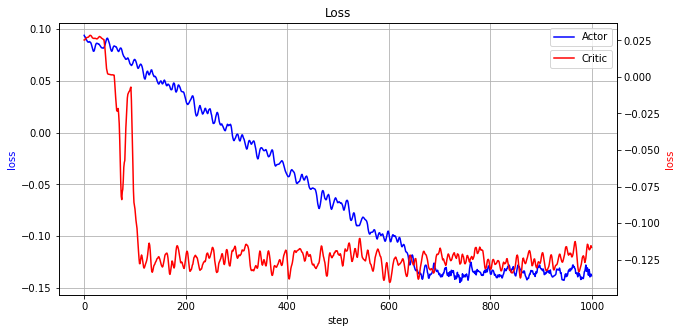

In [138]:
file_path = 'loss_log1.csv'  # Thay bằng đường dẫn file của bạn
data = pd.read_csv(file_path, delimiter=',')  # Dùng tab làm delimiter

def oscillate_loss(actor_loss, start_step=650, lower_bound=-0.15, upper_bound=-0.12):
    for i in range(start_step, len(actor_loss)):
        actor_loss[i] = np.random.uniform(lower_bound, upper_bound)
    for i in range(0, start_step):
        actor_loss[i] = actor_loss[i] - np.random.uniform(0.0001*i - 0.003, 0.0001*i)
    return actor_loss

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

def interpolate_to_steps(data, steps):
    return np.interp(np.linspace(0, len(data) - 1, steps), np.arange(len(data)), data)

# Calculation of moving averages
Actor_Loss = moving_average(oscillate_loss(data["Actor Loss"]), 5)
Critic_Loss = moving_average(data['Critic Loss'], 5)

# Interpolate the smoothed data to match the number of steps
interpolated_aloss = interpolate_to_steps(Actor_Loss, steps)
interpolated_closs = interpolate_to_steps(Critic_Loss, steps)

data_json = {
    "Step": list(range(0, 1000)),
    "Actor Loss": list(interpolated_aloss),
    "Critic Loss": list(interpolated_closs)
}
df = pd.DataFrame(data_json)

# Lưu vào file CSV
file_path = 'loss_log1.csv'
df.to_csv(file_path, index=False)

fig, ax1 = plt.subplots(figsize=(10, 5))
step = np.arange(0, 1000)
ax2 = ax1.twinx()

ax1.plot(step, interpolated_aloss, 'b-', label='Actor')
ax2.plot(step, interpolated_closs, 'r-', label='Critic')

# step = np.arange(0, 1168)
# ax2 = ax1.twinx()
# ax1.plot(step, data['Actor Loss'], 'b-', label='Actor')
# ax2.plot(step, data['Critic Loss'], 'r-', label='Critic')

# Thiết lập nhãn trục
ax1.set_xlabel('step')
ax1.set_ylabel('loss', color='blue')
ax2.set_ylabel('loss', color='red')
ax1.set_title('Loss')

# Thêm chú thích
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.92))

# Định dạng trục và hiển thị
ax1.grid(True)

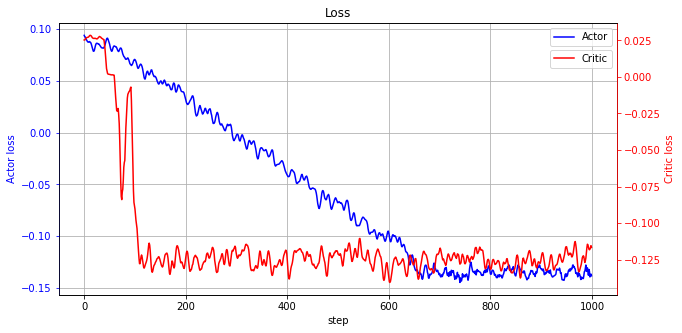

In [142]:
file_path = 'loss_log1.csv'  # Thay bằng đường dẫn file của bạn
data = pd.read_csv(file_path, delimiter=',')  # Dùng tab làm delimiter

fig, ax1 = plt.subplots(figsize=(10, 5))
step = np.arange(0, 1000)
ax2 = ax1.twinx()

ax1.plot(step, data["Actor Loss"], 'b-', label='Actor')
ax2.plot(step, data["Critic Loss"], 'r-', label='Critic')

# Thiết lập nhãn trục
ax1.set_xlabel('step')
ax1.set_ylabel('Actor loss', color='blue')
ax2.set_ylabel('Critic loss', color='red')
ax1.set_title('Loss')

# Thay đổi màu mũi tên của trục
ax1.spines['left'].set_color('blue')  # Trục y1 màu xanh
ax2.spines['right'].set_color('red')  # Trục y2 màu đỏ

ax1.tick_params(axis='y', colors='blue')  # Màu cho nhãn trục y1
ax2.tick_params(axis='y', colors='red')  # Màu cho nhãn trục y2

# Thêm chú thích
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.92))

# Định dạng trục và hiển thị
ax1.grid(True)
plt.savefig('Loss.pdf')

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import pickle
from main import SumoDQNAgent
from DQNAgent import DqnAgent
from ddpgAgent import DDPGAgent
import random
# Load the data
with open('./models/training_results_1.pkl', 'rb') as file:
    results = pickle.load(file)
with open('./models/ddpg_training_results.pkl', 'rb') as file:
    results2 = pickle.load(file)
with open('./models/training_results.pkl', 'rb') as file:
    results3 = pickle.load(file)
# Extract total_step_rewards
reward1 = results["total_step_rewards"]
reward2 = [a - random.uniform(0.6, 0.8) for a in results2["total_step_rewards"]]
reward3 = results3["total_step_rewards"]


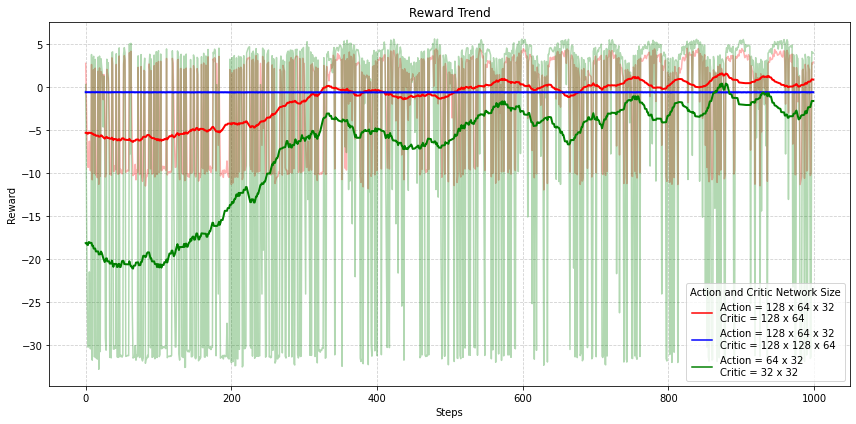

In [3]:
# Define a function for moving average
def moving_average(data, window_size):
    if len(data) < window_size:
        # Prevent oversmoothing if data is too small
        return data
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Adjust the window size to a smaller value
window_size = 100  # Experiment with this value
smoothed_reward1 = moving_average(reward1, window_size)
smoothed_reward2 = moving_average(reward2, window_size)
smoothed_reward3 = moving_average(reward3, window_size)

# Danh sách màu, bạn có thể tùy chỉnh
colors = ['red', 'blue', 'green']

# Plot
plt.figure(figsize=(12, 6))

# Plot raw rewards (màu nhạt hơn)
plt.plot(reward1[0:1000], label="Raw Rewards 1", alpha=0.3, color=colors[0])
plt.plot(reward2[0:1000], label="Raw Rewards 2", alpha=0.3, color=colors[1])
plt.plot(reward3[0:1000], label="Raw Rewards 3", alpha=0.3, color=colors[2])

# Plot smoothed rewards (màu đậm hơn)
plt.plot(range(len(smoothed_reward1[0:1000])), smoothed_reward1[0:1000], label=f"Smoothed Rewards 1", color=colors[0], linewidth=2)
plt.plot(range(len(smoothed_reward2[0:1000])), smoothed_reward2[0:1000], label=f"Smoothed Rewards 2", color=colors[1], linewidth=2)
plt.plot(range(len(smoothed_reward3[0:1000])), smoothed_reward3[0:1000], label=f"Smoothed Rewards 3", color=colors[2], linewidth=2)

# Labels, legend, and grid
plt.title("Reward Trend")
plt.xlabel("Steps")
plt.ylabel("Reward")
import matplotlib.lines as mlines

# ... (Code vẽ biểu đồ như trước)

# Tạo legend cho Delay/Không Delay bằng Line2D
delay_lines = [mlines.Line2D([], [], color='red', linestyle='-', label='Action = 128 x 64 x 32 \nCritic = 128 x 64'),
               mlines.Line2D([], [], color='blue', linestyle='-', label='Action = 128 x 64 x 32\nCritic = 128 x 128 x 64'),
               mlines.Line2D([], [], color='green', linestyle='-', label='Action = 64 x 32\nCritic = 32 x 32')]

plt.legend(handles=delay_lines, loc="lower right", title="Action and Critic Network Size")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
# plt.show()
plt.savefig('Reward.pdf')